Project 2 - Clustering

CS (STAT) 5525

# Instructions and Experiments

Note: Please read the entire project description before you begin. The goal of this project is to analyze the performance of clustering algorithms on several synthetic and real-world data sets. This will be done in the following steps:

* First, you will explore the data sets.
* Next, you will perform a series of experiments on which you will be asked to answer a series of questions. For these experiments, you will be running a python Jupyter notebook.
* Third, you will compile your answers in the form of a report.

# Python Jupyter Notebooks

We recommend installing Jupyter using Anaconda as it will also install other regularly used packages for scientific computing and data science. Some pointers to setup Jupyter notebooks on your system:

* Video link - https://www.youtube.com/watch?v=MvN7Wdh0Juk
* Medium Link - https://medium.com/@neuralnets/beginners-quick-guide-for-handlingissues-launching-jupyter-notebook-for-python-using-anaconda-8be3d57a209b
* Tutorials link - https://www.dataquest.io/blog/jupyter-notebook-tutorial/, https://www.youtube.com/watch?v=3C9E2yPBw7s


## Before you Begin
* Visually explore the data sets in the experiments below, and consider the following:
  * types of attributes
  * class distribution
  * which attributes appear to be good predictors, if any
  * possible correlation between attributes
  * any special structure that you might observe

  Note: The discussion of this exploration is not required in the report, but this step will help you get ready to answer the questions that follow

## Report and Submission
* Write a report addressing the experiment questions. Your project will be evaluated based only on what you write on the report. Submit the report as a PDF file on Canvas.
* Collect output from all your experiments and submit your Jupyter notebooks (cells displaying output) electronically as a separate zipped file on Canvas. We will look at your outputs if something is ambiguous in your report. Copy and paste the output from the Jupyter notebook into your report only to the limited extent needed to support your answers.

### Problem 1

The files for this problem are under Experiment 1 folder. Datasets to be used for experimentation: `2d data`, `chameleon`, `elliptical`, and `vertebrate`. Jupyter notebook: `cluster analysis.ipynb`. In this experiment, you will use different clustering techniques provided by the scikit-learn library package to answer the following questions:

1. On the movie ratings dataset, k-means clustering assign users to two clusters: cluster 0 has users with more affiinity for horror movies, and cluster 1 has users with more affinity for action movies. Given the cluster centroids, assign the following users to their respective cluster assignment:


| User   | Exorcist | Omen  | Star Wars  | Jaws  |
| ------ | -------- | ----- | ---------- | ----- |
| Paul   | 4        | 5     | 2          | 4     |
| Adel   | 1        | 2     | 3          | 4     |
| Kevin  | 2        | 3     | 5          | 5     |
| Jessi  | 1        | 1     | 3          | 2     |

In [10]:
import pandas as pd


ratings = [['john',5,5,2,1],['mary',4,5,3,2],['bob',4,4,4,3],['lisa',2,2,4,5],['lee',1,2,3,4],['harry',2,1,5,5]]
titles = ['user','Jaws','Star Wars','Exorcist','Omen']
movies = pd.DataFrame(ratings,columns=titles)
movies

,user,Jaws,Star Wars,Exorcist,Omen
0,john,5,5,2,1
1,mary,4,5,3,2
2,bob,4,4,4,3
3,lisa,2,2,4,5
4,lee,1,2,3,4
5,harry,2,1,5,5


In [11]:
from sklearn import cluster

data = movies.drop('user',axis=1)
k_means = cluster.KMeans(n_clusters=2, max_iter=100, random_state=1)
k_means.fit(data) 
labels = k_means.labels_
pd.DataFrame(labels, index=movies.user, columns=['Cluster ID'])

,Cluster ID
user,
john,1
mary,1
bob,1
lisa,0
lee,0
harry,0


In [12]:
centroids = k_means.cluster_centers_
pd.DataFrame(centroids,columns=data.columns)

,Jaws,Star Wars,Exorcist,Omen
0,1.666667,1.666667,4.0,4.666667
1,4.333333,4.666667,3.0,2.000000


In [13]:
import numpy as np

testData = np.array([[4,5,1,2],[3,2,4,4],[2,3,4,1],[3,2,3,3],[5,4,1,4]])
labels = k_means.predict(testData)
labels = labels.reshape(-1,1)
usernames = np.array(['paul','kim','liz','tom','bill']).reshape(-1,1)
cols = movies.columns.tolist()
cols.append('Cluster ID')
newusers = pd.DataFrame(np.concatenate((usernames, testData, labels), axis=1),columns=cols)
newusers

/Users/jonathanlow/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


,user,Jaws,Star Wars,Exorcist,Omen,Cluster ID
0,paul,4,5,1,2,1
1,kim,3,2,4,4,0
2,liz,2,3,4,1,1
3,tom,3,2,3,3,0
4,bill,5,4,1,4,1


2. To determine the optimal value of K in K-means, a common approach is to use the Elbow Method, where the idea is to find a K value that shows the sharpest change in slope of the SSE curve. For the movie rating dataset, what value of K would you arrive at by applying the Elbow Method visually? Briefly explain your reasoning.

Text(0, 0.5, 'SSE')

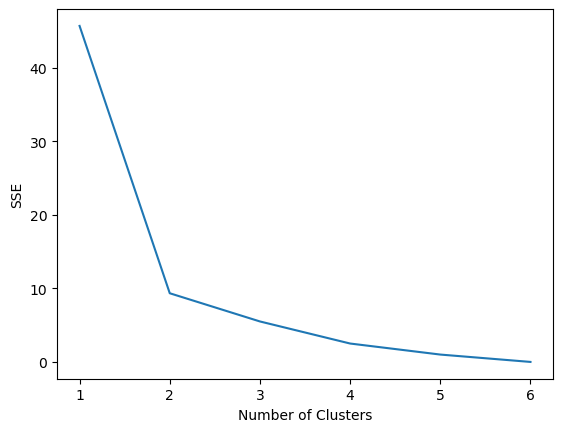

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

numClusters = [1,2,3,4,5,6]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(data)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

`I would say that the elbow method suggests that the 2 is the optimal K value because that is where the sharpest change in slope occurs`

3. On the Vertebrate dataset, we illustrate the results of using three hierarchical clustering algorithms (1) single link (MIN), (2) complete link (MAX), and (3) group average. Given the class label in the original dataset, compute the cophenetic correlation coefficient of the clustering produced by each algorithm. Which clustering algorithm shows the best match with the class labels?

In [15]:
import pandas as pd

data = pd.read_csv('vertebrate.csv',header='infer')
data

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians
5,komodo,0,0,0,0,1,0,reptiles
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,birds
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,fishes


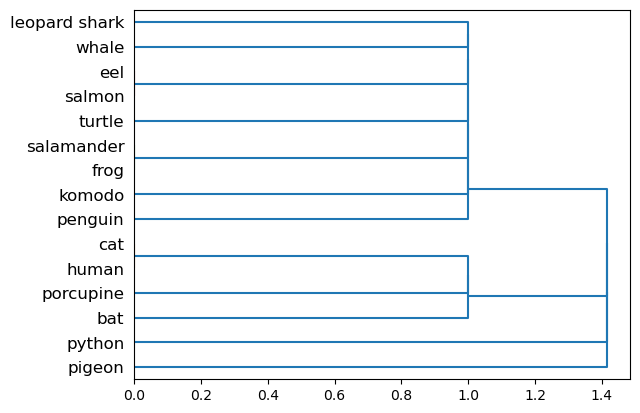

In [16]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
%matplotlib inline

names = data['Name']
Y = data['Class']
X = data.drop(['Name','Class'],axis=1)
Z = hierarchy.linkage(X.to_numpy(), 'single')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

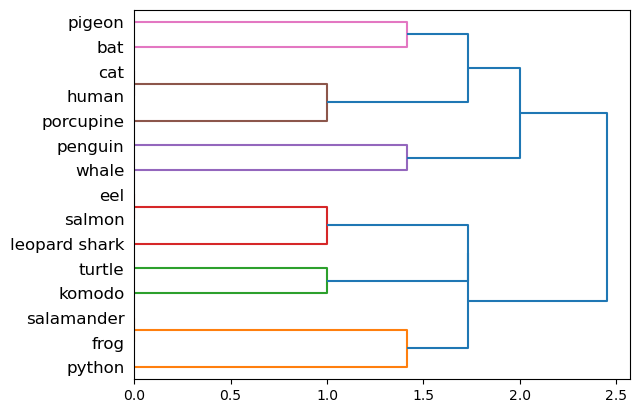

In [17]:
Z = hierarchy.linkage(X.to_numpy(), 'complete')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

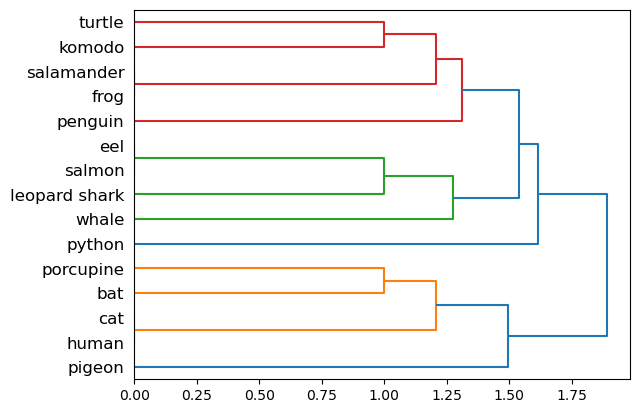

In [18]:
Z = hierarchy.linkage(X.to_numpy(), 'average')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

In [19]:
data[['Name','Class']].sort_values(by='Class')

,Name,Class
4,frog,amphibians
14,salamander,amphibians
7,pigeon,birds
11,penguin,birds
2,salmon,fishes
9,leopard shark,fishes
13,eel,fishes
0,human,mammals
3,whale,mammals
6,bat,mammals


Cophenetic correlation coefficient is 0.4886522572675798


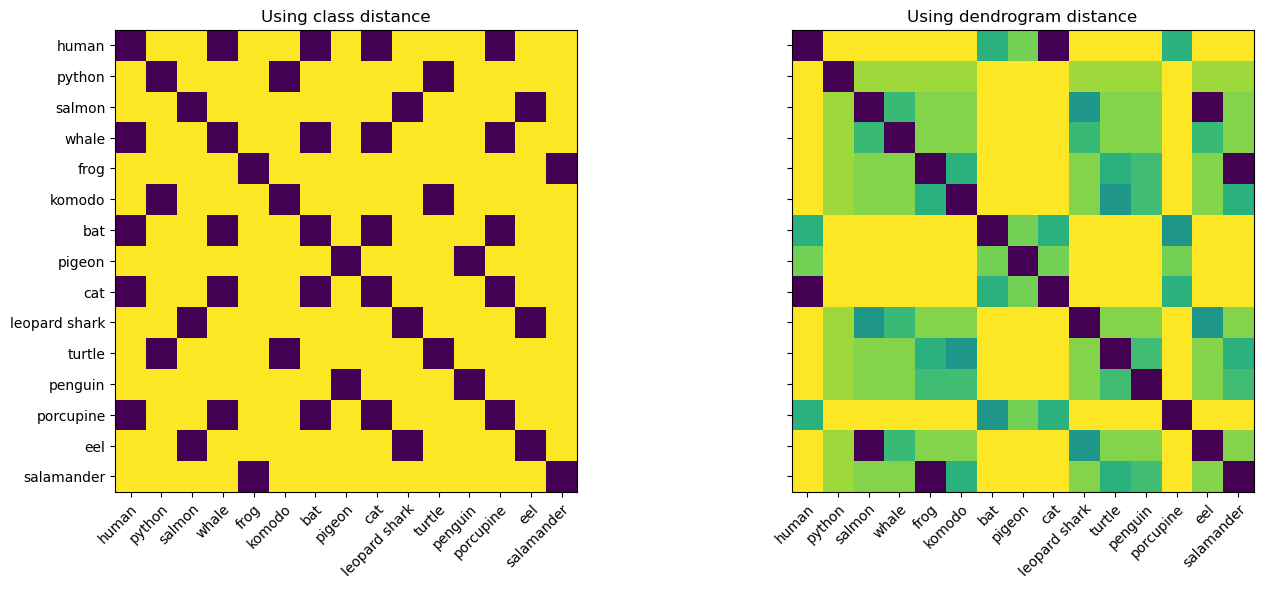

In [20]:
from scipy.spatial.distance import pdist, squareform

Yarr = pd.factorize(Y)[0].reshape(-1,1) # converting Y to a numeric ndarray
Ydist = pdist(Yarr,metric='hamming'); # computing pair-wise distances among animals using hamming distance over their class labels

fig, ax = plt.subplots(1,2, sharey=True, sharex=True, figsize=(16,6));
ax[0].imshow(squareform(Ydist));
ax[0].title.set_text('Using class distance');

Z = hierarchy.linkage(X.to_numpy(), 'average')
c, Zdist = hierarchy.cophenet(Z,Ydist); # Computing cophenetic correlation coefficient

ax[1].imshow(squareform(Zdist)); # plotting the distance among points based on the dendrogram
ax[1].title.set_text('Using dendrogram distance');
ax[0].set_yticks(np.arange(len(names)));
ax[0].set_yticklabels(names);
ax[0].set_xticks(np.arange(len(names)));
ax[0].set_xticklabels(names);
plt.setp(ax[0].get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor");
plt.setp(ax[1].get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor");
print (f"Cophenetic correlation coefficient is {c}")

Cophenetic correlation coefficient is 0.6063706366458652


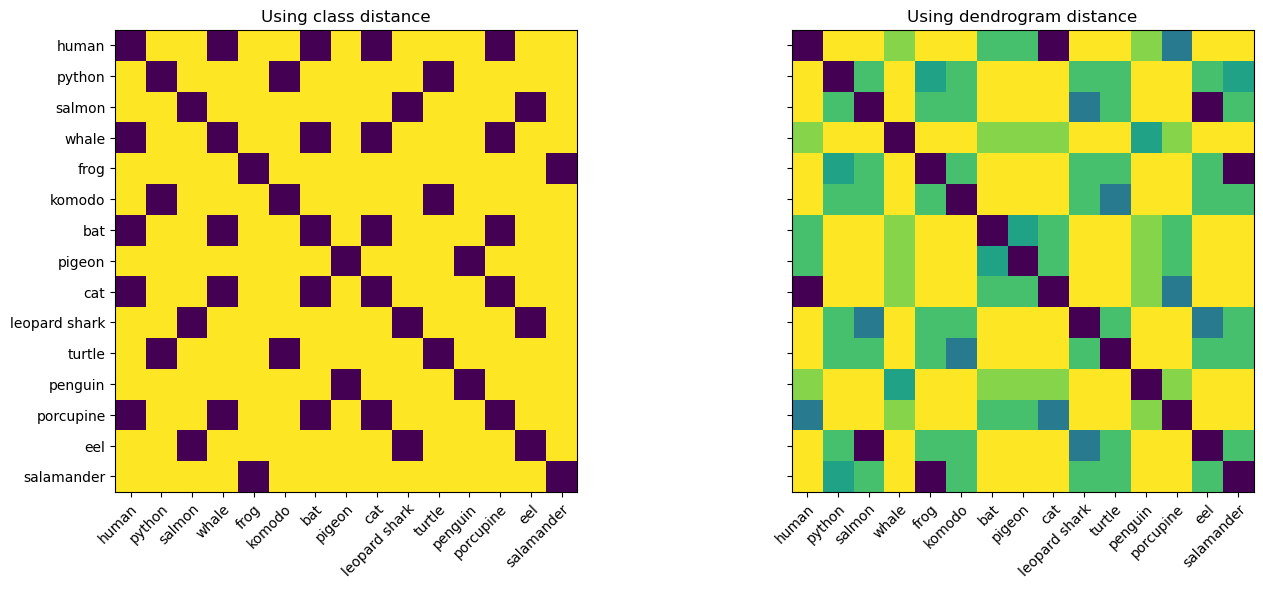

In [21]:
from scipy.spatial.distance import pdist, squareform

Yarr = pd.factorize(Y)[0].reshape(-1,1) # converting Y to a numeric ndarray
Ydist = pdist(Yarr,metric='hamming'); # computing pair-wise distances among animals using hamming distance over their class labels

fig, ax = plt.subplots(1,2, sharey=True, sharex=True, figsize=(16,6));
ax[0].imshow(squareform(Ydist));
ax[0].title.set_text('Using class distance');

Z = hierarchy.linkage(X.to_numpy(), 'complete')
c, Zdist = hierarchy.cophenet(Z,Ydist); # Computing cophenetic correlation coefficient

ax[1].imshow(squareform(Zdist)); # plotting the distance among points based on the dendrogram
ax[1].title.set_text('Using dendrogram distance');
ax[0].set_yticks(np.arange(len(names)));
ax[0].set_yticklabels(names);
ax[0].set_xticks(np.arange(len(names)));
ax[0].set_xticklabels(names);
plt.setp(ax[0].get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor");
plt.setp(ax[1].get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor");
print (f"Cophenetic correlation coefficient is {c}")

Cophenetic correlation coefficient is 0.35580411323343614


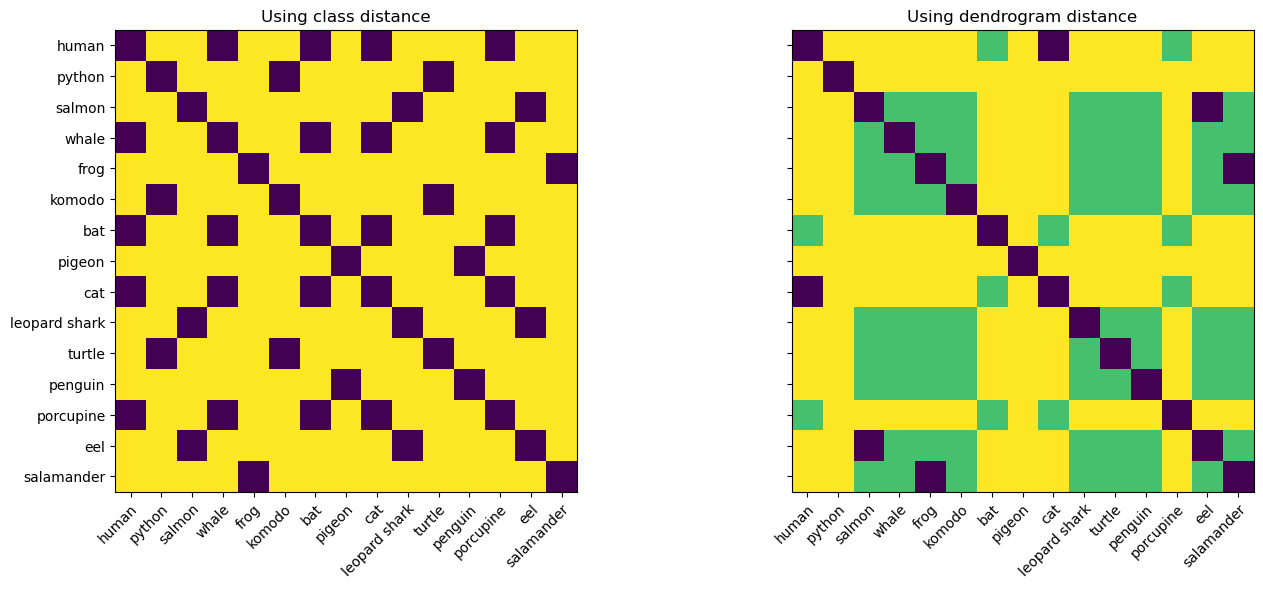

In [22]:
from scipy.spatial.distance import pdist, squareform

Yarr = pd.factorize(Y)[0].reshape(-1,1) # converting Y to a numeric ndarray
Ydist = pdist(Yarr,metric='hamming'); # computing pair-wise distances among animals using hamming distance over their class labels

fig, ax = plt.subplots(1,2, sharey=True, sharex=True, figsize=(16,6));
ax[0].imshow(squareform(Ydist));
ax[0].title.set_text('Using class distance');

Z = hierarchy.linkage(X.to_numpy(), 'single')
c, Zdist = hierarchy.cophenet(Z,Ydist); # Computing cophenetic correlation coefficient

ax[1].imshow(squareform(Zdist)); # plotting the distance among points based on the dendrogram
ax[1].title.set_text('Using dendrogram distance');
ax[0].set_yticks(np.arange(len(names)));
ax[0].set_yticklabels(names);
ax[0].set_xticks(np.arange(len(names)));
ax[0].set_xticklabels(names);
plt.setp(ax[0].get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor");
plt.setp(ax[1].get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor");
print (f"Cophenetic correlation coefficient is {c}")

`The complete clustering alogorithm shows the best match with the class labels`

4. On the chameleon dataset, how many clusters are produced by DBSCAN when the minimum number of points (min samples) is set to 1, 2, 3, 4, and 5, respectively, while neighborhood radius (eps) is set to a constant value of 15.5. For each instance, copy and paste the plot of the clusters.

<AxesSubplot:xlabel='x', ylabel='y'>

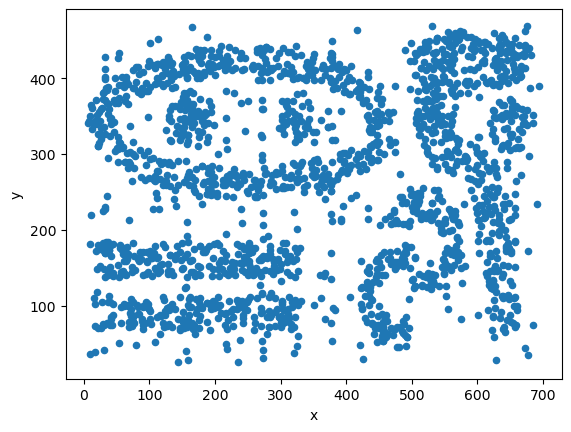

In [23]:
import pandas as pd

data = pd.read_csv('chameleon.data', delimiter=' ', names=['x','y'])
data.plot.scatter(x='x',y='y')

Number of clusters produced: 79


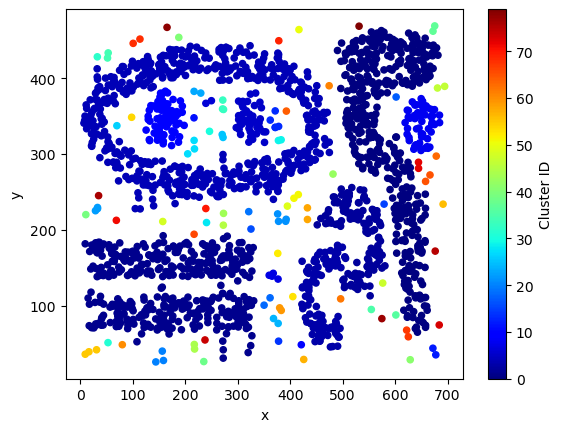

In [24]:
# min samples set to 1

from sklearn.cluster import DBSCAN

db = DBSCAN(eps=15.5, min_samples=1).fit(data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_,columns=['Cluster ID'])
result = pd.concat((data,labels), axis=1)
result.plot.scatter(x='x',y='y',c='Cluster ID', colormap='jet')
print (f"Number of clusters produced: {labels.max()[0]}")

Number of clusters produced: 33


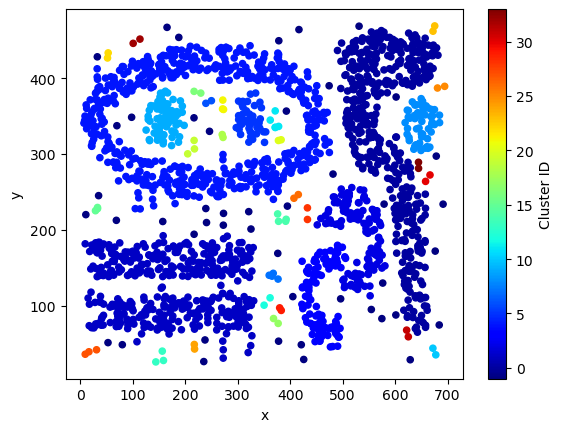

In [25]:
# min samples set to 2

from sklearn.cluster import DBSCAN

db = DBSCAN(eps=15.5, min_samples=2).fit(data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_,columns=['Cluster ID'])
result = pd.concat((data,labels), axis=1)
result.plot.scatter(x='x',y='y',c='Cluster ID', colormap='jet')
print (f"Number of clusters produced: {labels.max()[0]}")

Number of clusters produced: 15


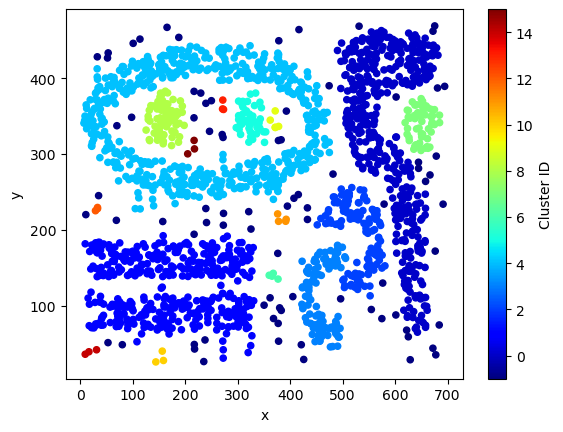

In [26]:
# min samples set to 3

from sklearn.cluster import DBSCAN

db = DBSCAN(eps=15.5, min_samples=3).fit(data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_,columns=['Cluster ID'])
result = pd.concat((data,labels), axis=1)
result.plot.scatter(x='x',y='y',c='Cluster ID', colormap='jet')
print (f"Number of clusters produced: {labels.max()[0]}")

Number of clusters produced: 10


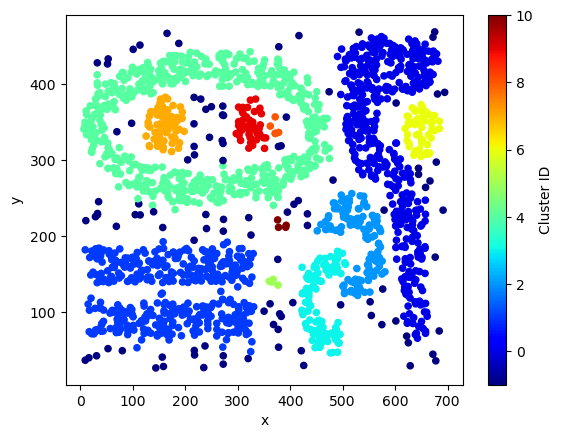

In [27]:
# min samples set to 4

from sklearn.cluster import DBSCAN

db = DBSCAN(eps=15.5, min_samples=4).fit(data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_,columns=['Cluster ID'])
result = pd.concat((data,labels), axis=1)
result.plot.scatter(x='x',y='y',c='Cluster ID', colormap='jet')
print (f"Number of clusters produced: {labels.max()[0]}")

Number of clusters produced: 8


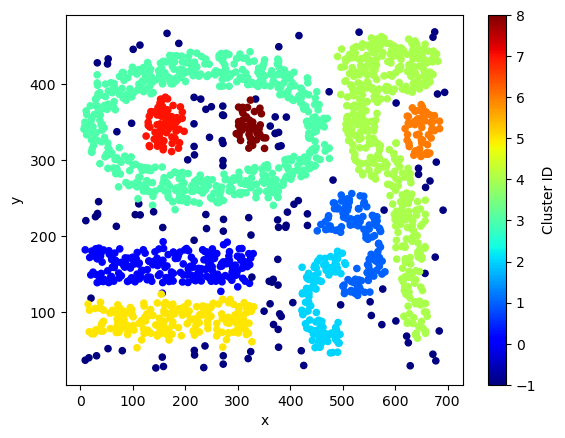

In [28]:
# min samples set to 5

from sklearn.cluster import DBSCAN

db = DBSCAN(eps=15.5, min_samples=5).fit(data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_,columns=['Cluster ID'])
result = pd.concat((data,labels), axis=1)
result.plot.scatter(x='x',y='y',c='Cluster ID', colormap='jet')
print (f"Number of clusters produced: {labels.max()[0]}")

5. For elliptical and 2D data, we applied k-means with k = 2. What happens if we use k = 10 for both these datasets? Copy and paste the clusters formed.

<AxesSubplot:xlabel='x', ylabel='y'>

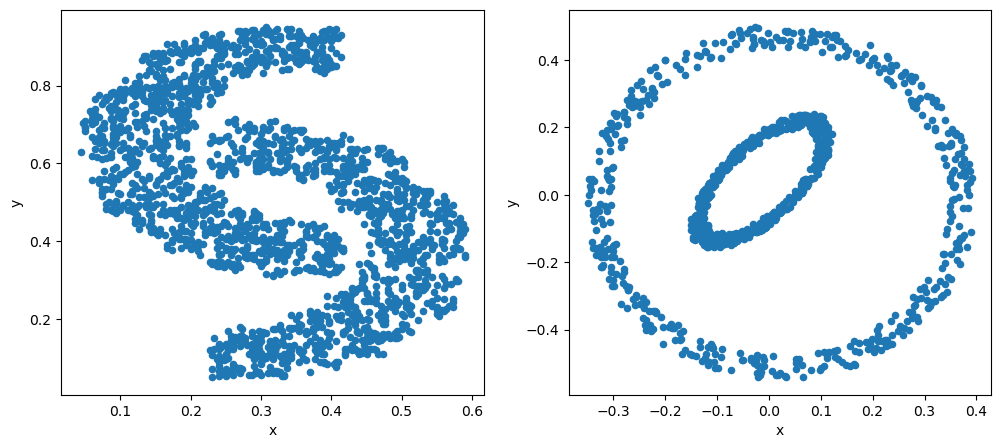

In [29]:
import pandas as pd

data1 = pd.read_csv('2d_data.txt', delimiter=' ', names=['x','y'])
data2 = pd.read_csv('elliptical.txt', delimiter=' ', names=['x','y'])

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
data1.plot.scatter(x='x',y='y',ax=ax1)
data2.plot.scatter(x='x',y='y',ax=ax2)

Text(0.5, 1.0, 'K-means Clustering')

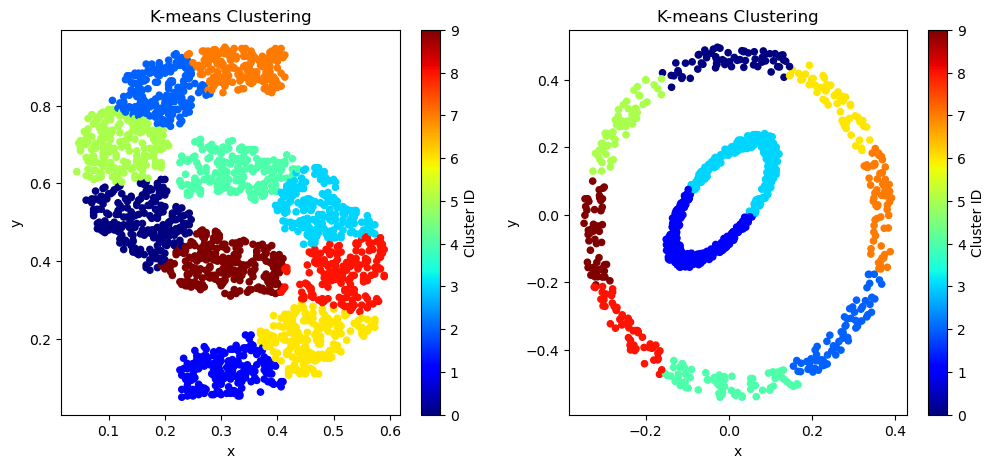

In [30]:
from sklearn import cluster

k_means = cluster.KMeans(n_clusters=10, max_iter=50, random_state=1)
k_means.fit(data1)
labels1 = pd.DataFrame(k_means.labels_,columns=['Cluster ID'])
result1 = pd.concat((data1,labels1), axis=1)

k_means2 = cluster.KMeans(n_clusters=10, max_iter=50, random_state=1)
k_means2.fit(data2)
labels2 = pd.DataFrame(k_means2.labels_,columns=['Cluster ID'])
result2 = pd.concat((data2,labels2), axis=1)

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
result1.plot.scatter(x='x',y='y',c='Cluster ID',colormap='jet',ax=ax1)
ax1.set_title('K-means Clustering')
result2.plot.scatter(x='x',y='y',c='Cluster ID',colormap='jet',ax=ax2)
ax2.set_title('K-means Clustering')

### Problem 2

The files for this problem are under Experiment 2 folder. Datasets to be used for experimentation are : `samsung test labels`, `samsung train labels`, `samsung train`, `samsung test`. Jupyter notebook: `pca and clustering.ipynb`. The data comes from the accelerometers and gyros of Samsung Galaxy S3 mobile phones (https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones).


In this data, the type of activity a person was performing with a phone in their pocket is also known - whether they were walking, standing, lying down, sitting, walking up or walking down the stairs. Answer the following questions:
1. Let us look at the correspondence between the cluster labels and the original activity class labels. We see that each cluster has points coming from multiple classes, and is thus impure. Let's look at the maximum percentage of points in a cluster that are coming from a single class, which we can call as the 'purity' metric. For example, if a cluster consisting of 300 points has the following distribution of class labels:

* class 1 - 200
* class 3 - 50
* class 6 - 50

then the purity metric for this cluster will be 200/300, which is approximately 0.67. A higher value of this metric for a cluster signifies higher purity of the cluster. Compute this metric for all of the 6 clusters produced by running Kmeans with K = 6 on the given dataset. What is the maximum purity metric across all 6 clusters?

In [31]:
import os

import numpy as np

X_train = np.loadtxt(os.path.join("samsung_train.txt"))
y_train = np.loadtxt(os.path.join(
                                  "samsung_train_labels.txt")).astype(int)

X_test = np.loadtxt(os.path.join("samsung_test.txt"))
y_test = np.loadtxt(os.path.join(
                                  "samsung_test_labels.txt")).astype(int)

In [32]:
X = np.vstack([X_train, X_test])
y = np.hstack([y_train, y_test])
n_classes = np.unique(y).size
print (f"Number of classes are {n_classes}")

Number of classes are 6


In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.shape

(10299, 561)

(10299, 65)

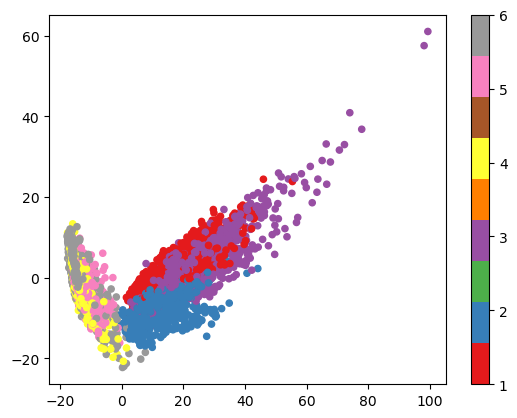

In [34]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=0.9, random_state=10).fit(X_scaled)
X_pca = pca.transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=20, cmap='Set1');
plt.colorbar()
X_pca.shape

In [35]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, n_init=100, 
                random_state=10)
kmeans.fit(X_pca)
cluster_labels = kmeans.labels_

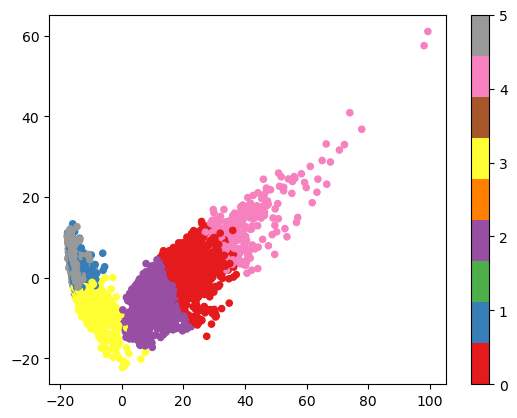

In [36]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, s=20,cmap='Set1');
plt.colorbar()


In [37]:
import pandas as pd

tab = pd.crosstab(y, cluster_labels, margins=True)
tab.index = ['walking', 'going up the stairs',
            'going down the stairs', 'sitting', 'standing', 'lying', 'all']
tab.columns = ['cluster' + str(i + 1) for i in range(6)] + ['all']
tab

,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,all
walking,741,0,903,0,78,0,1722
going up the stairs,296,0,1241,2,5,0,1544
going down the stairs,890,0,320,0,196,0,1406
sitting,0,1235,1,450,0,91,1777
standing,0,1344,0,562,0,0,1906
lying,0,52,5,329,0,1558,1944
all,1927,2631,2470,1343,279,1649,10299


2. What is the maximum purity metric for any cluster if we run Kmeans with K = 10 on the same dataset? Explain the rise/fall in purity as we increase K from 6 to 10.

In [38]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, n_init=100, 
                random_state=10)
kmeans.fit(X_pca)
cluster_labels = kmeans.labels_

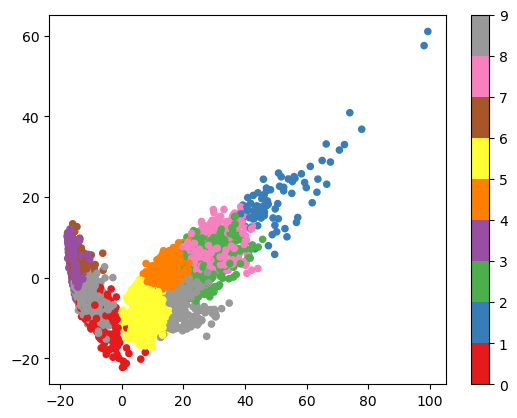

In [39]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, s=20,cmap='Set1');
plt.colorbar()


In [40]:
import pandas as pd

tab = pd.crosstab(y, cluster_labels, margins=True)
tab.index = ['walking', 'going up the stairs',
            'going down the stairs', 'sitting', 'standing', 'lying', 'all']
tab.columns = ['cluster' + str(i + 1) for i in range(10)] + ['all']
tab

,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7,cluster8,cluster9,cluster10,all
walking,0,11,141,0,918,378,0,195,0,79,1722
going up the stairs,0,0,63,0,153,1018,0,17,0,293,1544
going down the stairs,0,79,644,0,318,196,0,152,0,17,1406
sitting,88,0,0,70,0,1,1043,0,575,0,1777
standing,32,0,0,0,0,0,953,0,921,0,1906
lying,158,0,0,1592,0,2,47,0,145,0,1944
all,278,90,848,1662,1389,1595,2043,364,1641,389,10299


`The maximum purity metric for any of the clusters is 1592 when K = 10. There is a slight increase in maximum purity as we increase K from 6 to 10, but the metric changes for most, if not all, of the clusters.`

### Problem 3

The files for this problem are under Experiment 3 folder. Jupyter notebook: `covid-19research-challenge.ipynb`. In this experiment, we will be looking at the problem of clustering real-world research articles related to COVID-19. Dataset Download URL: https:// drive.google.com/file/d/1IC0s9QoBLWFN9tRI-z2QbJJWgngfAm8w/view?usp=sharing (Filename: CORD-19-research-challenge.zip, File size: 1.58 GB). Please download and unzip this file in the Experiment 3 folder before running the Python notebook for this problem. Dataset Description: In response to the COVID-19 pandemic, the White House and a coalition of leading research groups have prepared the COVID-19 Open Research Dataset (CORD-19). CORD-19 is a resource of over 29,000 scholarly articles, including over 13,000 with full text, about COVID-19, SARS-CoV-2, and related coronaviruses. This freely available dataset is provided to the global research community to apply recent advances in natural language processing and other AI techniques to generate new insights in support of the ongoing fight against this infectious disease. There is a growing urgency for these approaches because of the rapid acceleration in modern coronavirus literature, making it difficult for the medical research community to keep up. Answer the following questions.

1. After handling duplicates, what is the count, mean, standard deviation minimum, and maximum values for the abstract word count and body word count?

In [41]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob
import json

import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [42]:
root_path = 'CORD-19-research-challenge/'
metadata_path = f'{root_path}/metadata.csv'
meta_df = pd.read_csv(metadata_path, dtype={
    'pubmed_id': str,
    'Microsoft Academic Paper ID': str, 
    'doi': str
})
meta_df.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_pdf_parse,has_pmc_xml_parse,full_text_file,url
0,xqhn0vbp,1e1286db212100993d03cc22374b624f7caee956,PMC,Airborne rhinovirus detection and effect of ul...,10.1186/1471-2458-3-5,PMC140314,12525263,no-cc,"BACKGROUND: Rhinovirus, the most common cause ...",2003-01-13,"Myatt, Theodore A; Johnston, Sebastian L; Rudn...",BMC Public Health,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...
1,gi6uaa83,8ae137c8da1607b3a8e4c946c07ca8bda67f88ac,PMC,Discovering human history from stomach bacteria,10.1186/gb-2003-4-5-213,PMC156578,12734001,no-cc,Recent analyses of human pathogens have reveal...,2003-04-28,"Disotell, Todd R",Genome Biol,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...
2,le0ogx1s,NaN,PMC,A new recruit for the army of the men of death,10.1186/gb-2003-4-7-113,PMC193621,12844350,no-cc,"The army of the men of death, in John Bunyan's...",2003-06-27,"Petsko, Gregory A",Genome Biol,NaN,NaN,False,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...
3,fy4w7xz8,0104f6ceccf92ae8567a0102f89cbb976969a774,PMC,Association of HLA class I with severe acute r...,10.1186/1471-2350-4-9,PMC212558,12969506,no-cc,BACKGROUND: The human leukocyte antigen (HLA) ...,2003-09-12,"Lin, Marie; Tseng, Hsiang-Kuang; Trejaut, Jean...",BMC Med Genet,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...
4,0qaoam29,5b68a553a7cbbea13472721cd1ad617d42b40c26,PMC,A double epidemic model for the SARS propagation,10.1186/1471-2334-3-19,PMC222908,12964944,no-cc,BACKGROUND: An epidemic of a Severe Acute Resp...,2003-09-10,"Ng, Tuen Wai; Turinici, Gabriel; Danchin, Antoine",BMC Infect Dis,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...


In [43]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51078 entries, 0 to 51077
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   cord_uid                     51078 non-null  object
 1   sha                          38022 non-null  object
 2   source_x                     51078 non-null  object
 3   title                        50920 non-null  object
 4   doi                          47741 non-null  object
 5   pmcid                        41082 non-null  object
 6   pubmed_id                    37861 non-null  object
 7   license                      51078 non-null  object
 8   abstract                     42352 non-null  object
 9   publish_time                 51070 non-null  object
 10  authors                      48891 non-null  object
 11  journal                      46368 non-null  object
 12  Microsoft Academic Paper ID  964 non-null    object
 13  WHO #Covidence               17

In [44]:
all_json = glob.glob(f'{root_path}/**/*.json', recursive=True)
len(all_json)

59311

In [45]:
class FileReader:
    def __init__(self, file_path):
        with open(file_path) as file:
            content = json.load(file)
            self.paper_id = content['paper_id']
            self.abstract = []
            self.body_text = []
            # Abstract
            for entry in content['abstract']:
                self.abstract.append(entry['text'])
            # Body text
            for entry in content['body_text']:
                self.body_text.append(entry['text'])
            self.abstract = '\n'.join(self.abstract)
            self.body_text = '\n'.join(self.body_text)
    def __repr__(self):
        return f'{self.paper_id}: {self.abstract[:200]}... {self.body_text[:200]}...'
    
# Helper function adds break after every words when character length reach to certain amount. This is for the interactive plot so that hover tool fits the screen.
    
def get_breaks(content, length):
    data = ""
    words = content.split(' ')
    total_chars = 0

    # add break every length characters
    for i in range(len(words)):
        total_chars += len(words[i])
        if total_chars > length:
            data = data + "<br>" + words[i]
            total_chars = 0
        else:
            data = data + " " + words[i]
    return data


In [46]:
dict_ = {'paper_id': [], 'abstract': [], 'body_text': [], 'authors': [], 'title': [], 'journal': [], 'abstract_summary': []}
for idx, entry in enumerate(all_json):
    try:
        if idx % (len(all_json) // 10) == 0:
            print(f'Processing index: {idx} of {len(all_json)}')
        content = FileReader(entry)

        # get metadata information
        meta_data = meta_df.loc[meta_df['sha'] == content.paper_id]
        # no metadata, skip this paper
        if len(meta_data) == 0:
            continue

        dict_['paper_id'].append(content.paper_id)
        dict_['abstract'].append(content.abstract)
        dict_['body_text'].append(content.body_text)

        # also create a column for the summary of abstract to be used in a plot
        if len(content.abstract) == 0: 
            # no abstract provided
            dict_['abstract_summary'].append("Not provided.")
        elif len(content.abstract.split(' ')) > 100:
            # abstract provided is too long for plot, take first 300 words append with ...
            info = content.abstract.split(' ')[:100]
            summary = get_breaks(' '.join(info), 40)
            dict_['abstract_summary'].append(summary + "...")
        else:
            # abstract is short enough
            summary = get_breaks(content.abstract, 40)
            dict_['abstract_summary'].append(summary)

        # get metadata information
        meta_data = meta_df.loc[meta_df['sha'] == content.paper_id]

        try:
            # if more than one author
            authors = meta_data['authors'].values[0].split(';')
            if len(authors) > 2:
                # more than 2 authors, may be problem when plotting, so take first 2 append with ...
                dict_['authors'].append(". ".join(authors[:2]) + "...")
            else:
                # authors will fit in plot
                dict_['authors'].append(". ".join(authors))
        except Exception as e:
            # if only one author - or Null valie
            dict_['authors'].append(meta_data['authors'].values[0])

        # add the title information, add breaks when needed
        try:
            title = get_breaks(meta_data['title'].values[0], 40)
            dict_['title'].append(title)
        # if title was not provided
        except Exception as e:
            dict_['title'].append(meta_data['title'].values[0])

        # add the journal information
        dict_['journal'].append(meta_data['journal'].values[0])
        
    
    except Exception as e:
        continue
    
df_covid = pd.DataFrame(dict_, columns=['paper_id', 'abstract', 'body_text', 'authors', 'title', 'journal', 'abstract_summary'])
df_covid.head()

Processing index: 0 of 59311
Processing index: 5931 of 59311
Processing index: 11862 of 59311
Processing index: 17793 of 59311
Processing index: 23724 of 59311
Processing index: 29655 of 59311
Processing index: 35586 of 59311
Processing index: 41517 of 59311
Processing index: 47448 of 59311
Processing index: 53379 of 59311
Processing index: 59310 of 59311


,paper_id,abstract,body_text,authors,title,journal,abstract_summary
0,4ed70c27f14b7f9e6219fe605eae2b21a229f23c,,The Middle East respiratory syndrome coronavir...,"Al-Tawfiq, Jaffar A.. Memish, Ziad A.",Update on therapeutic options for Middle East...,Expert Rev Anti Infect Ther,Not provided.
1,306ef95a3a91e13a93bcc37fb2c509b67c0b5640,Thousands of people in the United States have ...,"The 2019 novel coronavirus (SARS-CoV-2), ident...","Bryson-Cahn, Chloe. Duchin, Jeffrey...",A Novel Approach for a Novel Pathogen: using ...,Clin Infect Dis,Thousands of people in the United States have...
2,ab680d5dbc4f51252da3473109a7885dd6b5eb6f,,The evolutionary history of humans is characte...,"Scarpino, S.V.",Evolutionary Medicine IV. Evolution and<br>Em...,Encyclopedia of Evolutionary Biology,Not provided.
3,6599ebbef3d868afac9daa4f80fa075675cf03bc,"International aviation is growing rapidly, res...","Sixty years ago, civil aviation was an infant ...","Macintosh, Andrew. Wallace, Lailey",International aviation emissions to 2025: Can...,Energy Policy,"International aviation is growing rapidly,<br..."
4,eb5c7f3ff921ad6469b79cc8a3c122648204ece4,,Acute infections of the gastrointestinal tract...,"Booth, I.W.. McNeish, A.S.",Mechanisms of diarrhoea,Baillière's Clinical Gastroenterology,Not provided.


In [47]:
dict_ = None

In [48]:
df_covid['abstract_word_count'] = df_covid['abstract'].apply(lambda x: len(x.strip().split()))
df_covid['body_word_count'] = df_covid['body_text'].apply(lambda x: len(x.strip().split()))
df_covid.head()

,paper_id,abstract,body_text,authors,title,journal,abstract_summary,abstract_word_count,body_word_count
0,4ed70c27f14b7f9e6219fe605eae2b21a229f23c,,The Middle East respiratory syndrome coronavir...,"Al-Tawfiq, Jaffar A.. Memish, Ziad A.",Update on therapeutic options for Middle East...,Expert Rev Anti Infect Ther,Not provided.,0,2748
1,306ef95a3a91e13a93bcc37fb2c509b67c0b5640,Thousands of people in the United States have ...,"The 2019 novel coronavirus (SARS-CoV-2), ident...","Bryson-Cahn, Chloe. Duchin, Jeffrey...",A Novel Approach for a Novel Pathogen: using ...,Clin Infect Dis,Thousands of people in the United States have...,50,944
2,ab680d5dbc4f51252da3473109a7885dd6b5eb6f,,The evolutionary history of humans is characte...,"Scarpino, S.V.",Evolutionary Medicine IV. Evolution and<br>Em...,Encyclopedia of Evolutionary Biology,Not provided.,0,2884
3,6599ebbef3d868afac9daa4f80fa075675cf03bc,"International aviation is growing rapidly, res...","Sixty years ago, civil aviation was an infant ...","Macintosh, Andrew. Wallace, Lailey",International aviation emissions to 2025: Can...,Energy Policy,"International aviation is growing rapidly,<br...",140,5838
4,eb5c7f3ff921ad6469b79cc8a3c122648204ece4,,Acute infections of the gastrointestinal tract...,"Booth, I.W.. McNeish, A.S.",Mechanisms of diarrhoea,Baillière's Clinical Gastroenterology,Not provided.,0,6972


In [49]:
df_covid.describe(include='all')

,paper_id,abstract,body_text,authors,title,journal,abstract_summary,abstract_word_count,body_word_count
count,36009,36009,36009,35413,35973,34277,36009,36009.000000,36009.000000
unique,36009,26249,35981,33538,35652,5410,26239,NaN,NaN
top,4ed70c27f14b7f9e6219fe605eae2b21a229f23c,,"In previous reports, workers have characterize...","Domingo, Esteban",In the Literature,PLoS One,Not provided.,NaN,NaN
freq,1,9704,3,14,9,1518,9704,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160.511678,4705.127163
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168.348075,6944.838042
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,2370.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,158.000000,3645.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,235.000000,5450.000000


`The count, mean, standard deviation, minimum, and maximum values for the abstract word count are 36009, 160.51, 168.35, 0, and 4767 respectively. The count, mean, standard deviation, minimum, and maximum values for the body word count are 36009, 4705.13, 6944.84, 1, and 260738 respectively.`

2. Given the following word list: ['the', '2019', 'novel', 'coronavirus', 'sarscov2', 'identified', 'as', 'the', 'cause'], what is its corresponding list of 2-grams ?

In [50]:
text = df_covid.drop(["paper_id", "abstract", "abstract_word_count", "body_word_count", "authors", "title", "journal", "abstract_summary"], axis=1)

In [51]:
text.head(5)

,body_text
0,The Middle East respiratory syndrome coronavir...
1,"The 2019 novel coronavirus (SARS-CoV-2), ident..."
2,The evolutionary history of humans is characte...
3,"Sixty years ago, civil aviation was an infant ..."
4,Acute infections of the gastrointestinal tract...


In [52]:
text_arr = text.stack().tolist()
len(text_arr)

36009

In [53]:
words = []
for ii in range(0,len(text)):
    words.append(str(text.iloc[ii]['body_text']).split(" "))

In [54]:
print(words[0][:20])

['The', 'Middle', 'East', 'respiratory', 'syndrome', 'coronavirus', '(MERS-CoV)', 'emerged', 'as', 'an', 'important', 'virus', 'in', '2012', 'and', 'since', 'then', 'has', 'caused', 'multiple']


In [ ]:
n_gram_all = []

for word in words:
    # get n-grams for the instance
    n_gram = []
    for i in range(len(word)-2+1):
        n_gram.append("".join(word[i:i+2]))
    n_gram_all.append(n_gram)

In [ ]:
conda install tensorflow

In [ ]:
n_gram_all[0][:10]

`The corresponding list of 2-grams is 'TheMiddle', 'MiddleEast', 'Eastrespiratory', 'respiratorysyndrome', 'syndromecoronavirus', 'coronavirus(MERS-CoV)', '(MERS-CoV)emerged', 'emergedas', 'asan', and 'animportant'`

3. When we applied k-means clustering with K = 10 on the data created using HashingVectorizer features from 2-grams, we could see that some clusters still had some overlap in the t-SNE plot. Can you improve this by changing the number of clusters? What value of K visually leads to good separation among the clusters in the t-SNE plot? Copy and paste the corresponding t-SNE plot.

In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer

# hash vectorizer instance
hvec = HashingVectorizer(lowercase=False, analyzer=lambda l:l, n_features=2**12)

# features matrix X
X = hvec.fit_transform(n_gram_all)

In [ ]:
X.shape

In [ ]:
# Following cell may take 20-30 minutes to run

from sklearn.manifold import TSNE

tsne = TSNE(verbose=1, perplexity=5)
X_embedded = tsne.fit_transform(X.toarray())

In [ ]:
from sklearn.cluster import MiniBatchKMeans

k = 20
kmeans = MiniBatchKMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

In [ ]:
# sns settings
import seaborn as sns
import random

sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("bright", len(set(y_pred)))

# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_pred, legend='full', palette=palette)
plt.title("t-SNE Covid-19 Articles - Clustered")
# plt.savefig("plots/t-sne_covid19_label.png")
plt.show()

4. By using tf-idf vectorizer and plain text features instead of 2-grams, we could see that the clusters obtained from K-means clustering (with K = 10) are more separable in the t-SNE plot. What happens when we apply the tf-idf vectorizer on the 2-gram representation of documents instead of plain text, and then apply K-means clustering with K = 10? Copy and paste the corresponding t-SNE plot.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2**12)
X = vectorizer.fit_transform(n_gram_all)

In [ ]:
X.shape

In [ ]:
from sklearn.cluster import MiniBatchKMeans

k = 10
kmeans = MiniBatchKMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

In [ ]:
y = y_pred

In [ ]:
# Following cell will take 20-30 minutes to run
from sklearn.manifold import TSNE

tsne = TSNE(verbose=1)
X_embedded = tsne.fit_transform(X.toarray())

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("bright", len(set(y)))

# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y, legend='full', palette=palette)
plt.title("t-SNE Covid-19 Articles - Clustered(K-Means) - Tf-idf with Plain Text")
# plt.savefig("plots/t-sne_covid19_label_TFID.png")
plt.show()

5. In the interactive t-SNE with 20 clusters, can you do a manual analysis of different clusters to see what articles are clustered together? Choose any 5 clusters and write 4-5 keywords that describe it. Hover your mouse over the cluster point and you can see the article that it refers. You can use the box zoom feature to choose to display points of only one cluster in the plot, to simplify your analysis. Also, name the clusters that include articles involving social and economic impacts of the coronavirus?

In [ ]:
from bokeh.models import ColumnDataSource, HoverTool, LinearColorMapper, CustomJS
from bokeh.palettes import Category20
from bokeh.transform import linear_cmap
from bokeh.io import output_file, show
from bokeh.transform import transform
from bokeh.io import output_notebook
from bokeh.plotting import figure
from bokeh.layouts import column
from bokeh.models import RadioButtonGroup
from bokeh.models import TextInput
from bokeh.layouts import gridplot
from bokeh.models import Div
from bokeh.models import Paragraph
from bokeh.layouts import column, widgetbox

output_notebook()
y_labels = y_pred

# data sources
source = ColumnDataSource(data=dict(
    x= X_embedded[:,0], 
    y= X_embedded[:,1],
    x_backup = X_embedded[:,0],
    y_backup = X_embedded[:,1],
    desc= y_labels, 
    titles= df_covid['title'],
    authors = df_covid['authors'],
    journal = df_covid['journal'],
    abstract = df_covid['abstract_summary'],
    labels = ["C-" + str(x) for x in y_labels]
    ))

# hover over information
hover = HoverTool(tooltips=[
    ("Title", "@titles{safe}"),
    ("Author(s)", "@authors"),
    ("Journal", "@journal"),
    ("Abstract", "@abstract{safe}"),
],
                 point_policy="follow_mouse")

# map colors
mapper = linear_cmap(field_name='desc', 
                     palette=Category20[20],
                     low=min(y_labels) ,high=max(y_labels))

# prepare the figure
p = figure(plot_width=800, plot_height=800, 
           tools=[hover, 'pan', 'wheel_zoom', 'box_zoom', 'reset'], 
           title="t-SNE Covid-19 Articles, Clustered(K-Means), Tf-idf with Plain Text", 
           toolbar_location="right")

# plot
p.scatter('x', 'y', size=5, 
          source=source,
          fill_color=mapper,
          line_alpha=0.3,
          line_color="black",
          legend = 'labels')

# add callback to control 
callback = CustomJS(args=dict(p=p, source=source), code="""
            
            var radio_value = cb_obj.active;
            var data = source.data; 
            
            x = data['x'];
            y = data['y'];
            
            x_backup = data['x_backup'];
            y_backup = data['y_backup'];
            
            labels = data['desc'];
            
            if (radio_value == '20') {
                for (i = 0; i < x.length; i++) {
                    x[i] = x_backup[i];
                    y[i] = y_backup[i];
                }
            }
            else {
                for (i = 0; i < x.length; i++) {
                    if(labels[i] == radio_value) {
                        x[i] = x_backup[i];
                        y[i] = y_backup[i];
                    } else {
                        x[i] = undefined;
                        y[i] = undefined;
                    }
                }
            }


        source.change.emit();
        """)

# callback for searchbar
keyword_callback = CustomJS(args=dict(p=p, source=source), code="""
            
            var text_value = cb_obj.value;
            var data = source.data; 
            
            x = data['x'];
            y = data['y'];
            
            x_backup = data['x_backup'];
            y_backup = data['y_backup'];
            
            abstract = data['abstract'];
            titles = data['titles'];
            authors = data['authors'];
            journal = data['journal'];

            for (i = 0; i < x.length; i++) {
                if(abstract[i].includes(text_value) || 
                   titles[i].includes(text_value) || 
                   authors[i].includes(text_value) || 
                   journal[i].includes(text_value)) {
                    x[i] = x_backup[i];
                    y[i] = y_backup[i];
                } else {
                    x[i] = undefined;
                    y[i] = undefined;
                }
            }
            


        source.change.emit();
        """)

# option
option = RadioButtonGroup(labels=["C-0", "C-1", "C-2",
                                  "C-3", "C-4", "C-5",
                                  "C-6", "C-7", "C-8",
                                  "C-9", "C-10", "C-11",
                                  "C-12", "C-13", "C-14",
                                  "C-15", "C-16", "C-17",
                                  "C-18", "C-19", "All"], 
                          active=20, callback=callback)

# search box
keyword = TextInput(title="Search:", callback=keyword_callback)

#header
header = Div(text="""<h1>COVID-19 Literature Cluster</h1>""")

# show
show(column(header, widgetbox(option, keyword),p))